In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("fcc-forum-pageviews.csv")

## Cleaning Data set

In [30]:
#df = df.set_index('date')

df = df.drop(df[df['value'] <= df['value'].quantile(.025)].index)
df = df.drop(df[df['value'] >= df['value'].quantile(.975)].index)

df

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


## Line graph that shows daily page views for free code camp from 5/2016-12/2019

In [31]:
from turtle import color, title


def draw_line_plot(dataset):
    plt.figure(figsize=(8,5), facecolor='White', edgecolor='black')
    plt.plot('date','value', data=df, color = 'red')
    plt.xlabel("Date")
    plt.xticks(["2016-07-01", "2017-01-01","2017-07-01", "2018-01-01", "2018-07-01", "2019-01-01", "2019-07-01", "2020-01-01"])
    plt.ylabel("Page Views")
    #plt.yticks(np.arange(0, 180000, 20000))
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.tick_params(axis='x', labelsize=7)
    return plt.show()

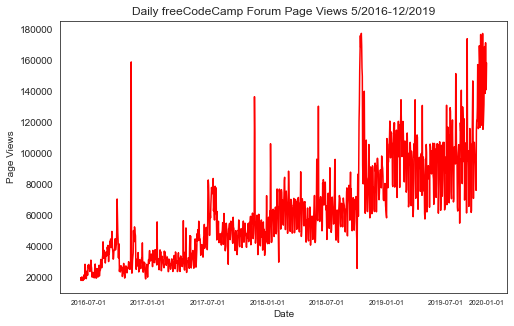

In [32]:
draw_line_plot(df)

In [33]:
## splitting up months and years
split = df['date'].str.split(pat='-')

years = []
months = []

for i in split:
    years.append(i[0])
    months.append(i[1])

df['year'] = years
df['months'] = months


In [34]:
grouped = df.groupby(["year", "months"]).mean().reset_index()

#grouped["value"].mean()
grouped.head(10)


,year,months,value
0,2016,05,19432.400000
1,2016,06,21875.105263
2,2016,07,24109.678571
3,2016,08,31049.193548
4,2016,09,41476.866667
5,2016,10,27398.322581
6,2016,11,40448.633333
7,2016,12,27832.419355
8,2017,01,32785.161290
9,2017,02,31113.071429


In [35]:
#def draw_bar_plot(datas):
final = grouped.pivot(columns='months', values='value', index='year')


<AxesSubplot:xlabel='years', ylabel='Average Page Views'>

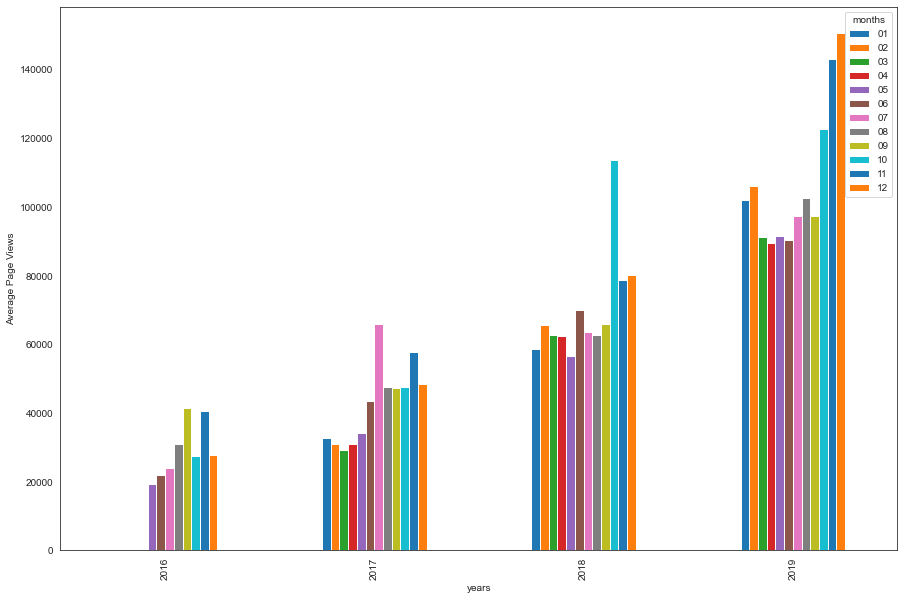

In [36]:

final.plot(kind='bar', xlabel = 'years', ylabel = "Average Page Views", figsize = (15,10))


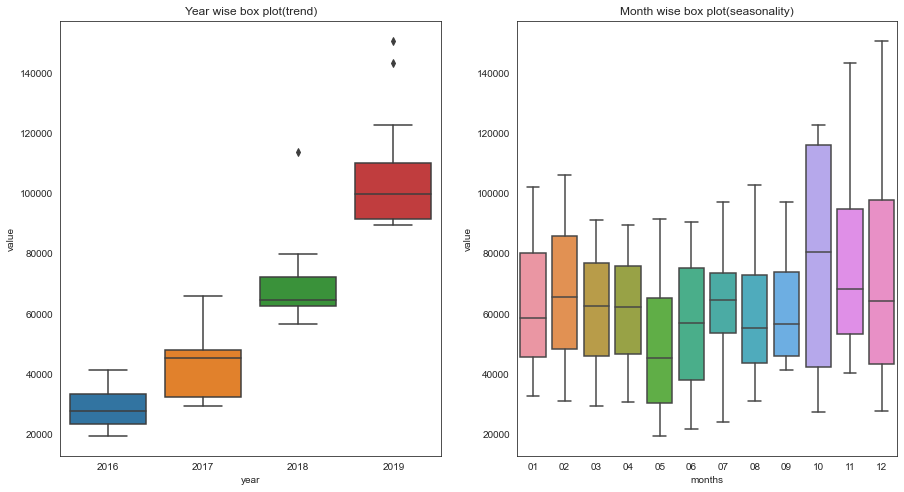

In [37]:
def draw_box_plot(datas):

    fig,axes = plt.subplots(nrows = 1,ncols = 2, figsize =(15,8))


    axes[0]=sns.boxplot(x = datas['year'], y = datas['value'], ax = axes[0] )
    datas = datas.sort_values("months")
    axes[1]=sns.boxplot(x = datas['months'], y = datas['value'], ax=axes[1], )
    axes[0].set_title("Year wise box plot(trend)")   
    axes[1].set_title("Month wise box plot(seasonality)")  
    sns.set_style("white")

draw_box_plot(grouped)


